# Project: European Soccer Data Analysis

## Table of contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be analyzing data associated with European Soccer for the period between 2008 and 2016. In particular, I will be interested in finding trends among leagues and teams who scored the most, which players had the most penalties and individual comparison between two players.

In [472]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In this section I will be exploaring the dataframes and try to understand it to perform better analysis.

In [473]:
# Create the connection
database = ("database.sqlite")
conn = sqlite3.connect(database)

# check the tables
tables = pd.read_sql("""SELECT * 
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [653]:
# create the dataframes
df_league = pd.read_sql_query("select * from League;", conn)
df_player_attributes = pd.read_sql_query("select * from Player_Attributes;", conn)
df_player = pd.read_sql_query("select * from Player;", conn)
df_match = pd.read_sql_query("select * from Match;", conn)
df_country = pd.read_sql_query("select * from Country;", conn)
df_team_attributes = pd.read_sql_query("select * from Team_Attributes;", conn)
df_team = pd.read_sql_query("select * from Team;", conn)
df_sequence = pd.read_sql_query("select * from sqlite_sequence", conn)

### Inspect the dataframes

In this section, I will explore, and understand the dataframes. I've combined each table in a subsection to ease the analysis.

#### Sqlite Sequence table

In [581]:
df_sequence.head(1)

,name,seq
0,Team,103916


In [583]:
df_sequence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    7 non-null      object
 1   seq     7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [584]:
df_sequence.head(7)

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075
5,Player_Attributes,183978
6,Team_Attributes,1458


#### League table

In [475]:
df_league.head(1)

,id,country_id,name
0,1,1,Belgium Jupiler League


In [602]:
df_league.shape

(11, 3)

In [601]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [478]:
df_league.isnull().any(axis=1).sum()

0

There is no need to clean League table since it does not include any missing or duplicated data.

#### Player table

In [479]:
df_player.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [480]:
df_player.shape

(11060, 7)

In [481]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [482]:
df_player.isnull().any(axis=1).sum()

0

Player table might require cleaning process such as modify Weight data type to float, or drop unneeded columns "Birthday", "Height", "Weight"

#### Match table

In [483]:
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [485]:
df_match.shape

(25979, 115)

In [654]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [655]:
df_match.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [488]:
# sum(df_match.isnull().any(axis=1))

24217

In [489]:
# df_match.duplicated().sum()

0

Match table include a massive amount of data which will be helpfull for the analysis. Also, it has null values which need to be removed.

#### Country table

In [490]:
df_country.head(1)

,id,name
0,1,Belgium


In [491]:
df_country.shape

(11, 2)

In [492]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


There is no need to clean Country table since it does not include any missing or duplicated data.

#### Team table

In [493]:
df_team.head(1)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN


In [494]:
df_team.shape

(299, 5)

In [495]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [496]:
sum(df_team.isnull().any(axis=1))

11

There is no need to do a lot of changes unless remove the null data.

#### Player Attributes table

In [497]:
df_player_attributes.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [498]:
df_player_attributes.shape

(183978, 42)

In [499]:
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [500]:
df_player_attributes.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


The data shows the average of the players is around 68% which is very good.

In [501]:
df_player_attributes.max()

id                                 183978
player_fifa_api_id                 234141
player_api_id                      750584
date                  2016-07-07 00:00:00
overall_rating                         94
potential                              97
crossing                               95
finishing                              97
heading_accuracy                       98
short_passing                          97
volleys                                93
dribbling                              97
curve                                  94
free_kick_accuracy                     97
long_passing                           97
ball_control                           97
acceleration                           97
sprint_speed                           97
agility                                96
reactions                              96
balance                                96
shot_power                             97
jumping                                96
stamina                           

In [502]:
sum(df_player_attributes.isnull().any(axis=1))

3624

In [503]:
df_player_attributes.duplicated().any()

False

There is no need to do a lot of changes unless remove the null data.

#### Team Attributes table

In [504]:
df_team_attributes.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


In [505]:
df_team_attributes.shape

(1458, 25)

In [506]:
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [507]:
df_team_attributes.isnull().any(axis=1).sum()

969

In [508]:
df_team_attributes.duplicated().any()

False

### Data Cleaning

After assessing the structure of the data there is need to rename columns, fill or drop null values, and merge tables. I will be renaming, filling, dropping and merging the dataframes for each reserach separately.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1
#### Which players had the most penalties?

Combining `df_player` and `df_player_attributes` dataframes to have player name and player attributes in a single dataframe

In [777]:
# From df_player dataframe I selected "player_api_id" and "player_name"
df_player_new = df_player[['player_api_id', 'player_name' ]]

# From df_player_attributes dataframe I selected "player_api_id" and "overall_rating", "date" and "penalties"
df_player_attributes_new = df_player_attributes[
    ['player_api_id', 'overall_rating', 'date', 'penalties']]

In [778]:
# merging the two dataframes
df_comb_player = pd.merge(df_player_new, df_player_attributes_new, on="player_api_id")

# check the new dataframe
df_comb_player.head(1)

,player_api_id,player_name,overall_rating,date,penalties
0,505942,Aaron Appindangoye,67.0,2016-02-18 00:00:00,48.0


In [781]:
# Groupby function is used to group the names and the total of penalties for each player
player_grp = df_comb_player.groupby("player_name")['penalties'].sum().reset_index().sort_values(by = "penalties", ascending = False)

player_grp

,player_name,penalties
2168,Danilo,6358.0
396,Alex,6140.0
3242,Fernando,4764.0
2726,Douglas,4687.0
5309,Josue,4671.0
...,...,...
9115,Rui Vieira,45.0
8711,Ricardo Campos,39.0
2772,Dziugas Bartkus,36.0
9894,Sven van der Jeugt,28.0


In [782]:
player_grp = player_grp[:10]
player_grp

,player_name,penalties
2168,Danilo,6358.0
396,Alex,6140.0
3242,Fernando,4764.0
2726,Douglas,4687.0
5309,Josue,4671.0
8592,Rafinha,4633.0
389,Alessio Cerci,4314.0
1520,Carlos Eduardo,4306.0
6349,Maicon,4263.0
2557,Diego,4259.0


Danilo is the player who had the most penalties between 2008 and 2016

### Research Question 2
#### Which league scored the most between 2008 and 2016?

Combining `df_leage` and `df_match` dataframes to have the leage name and the total of home and away goals in a single dataframe

In [694]:
# From League dataframe I selected "name" and country_id
df_league_name = df_league[['name', 'country_id']]

# From Match dataframe I selected "home_team_goal", "away_team_goal" and "country_id"
df_number_goals = df_match[['home_team_goal', 'away_team_goal', 'country_id']]

# I named the new dataset as "df_comb_goals"
df_comb_goals = pd.merge(df_league_name, df_number_goals, on='country_id')

In [518]:
df_comb_goals.head(1)

,name,country_id,home_team_goal,away_team_goal
0,England Premier League,1729,0,0


In [695]:
away_goal_grp = df_comb_goals.groupby('name')['away_team_goal'].sum().reset_index().sort_values(by = "away_team_goal", ascending = False)
away_goal_grp[:5]

,name,away_team_goal
1,England Premier League,3525
9,Spain LIGA BBVA,3453
4,Italy Serie A,3367
5,Netherlands Eredivisie,3185
2,France Ligue 1,3162


In [696]:
home_goal_grp = df_comb_goals.groupby('name')['home_team_goal'].sum().reset_index().sort_values(by = "home_team_goal", ascending = False)
home_goal_grp[:5]

,name,home_team_goal
9,Spain LIGA BBVA,4959
1,England Premier League,4715
4,Italy Serie A,4528
5,Netherlands Eredivisie,4357
2,France Ligue 1,4265


The England Premier League is ranked as the heighest league who scored outside England. On the other hand the Spain League is ranked as the heighest league who scored inside Spain. It seems there is a challenge between Spain and England to be ranked as the first country in both occasions.

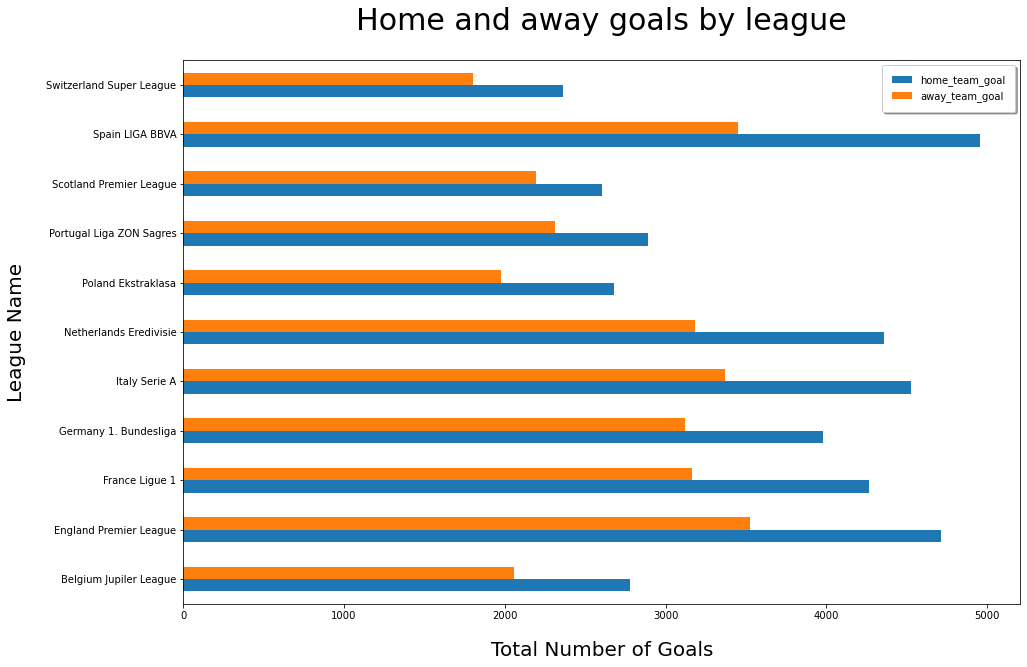

In [766]:
home_away_goal_grp = df_comb_goals.groupby("name").agg({"home_team_goal":"sum",
                                                          "away_team_goal":"sum"}).plot(kind="barh", 
                                                                                        figsize = (15,10), 
                                                                                        linewidth =0.2)
        
plt.title("Home and away goals by league", color="black", size="30", pad=30)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.xlabel("Total Number of Goals", size="20", labelpad=20)
plt.ylabel("League Name", size="20", labelpad=20)
plt.show()

The above chart illustrate how many home and away goals for each league. It seems that away goals is not so easy since the away goals is less than home goal for all the leagues.

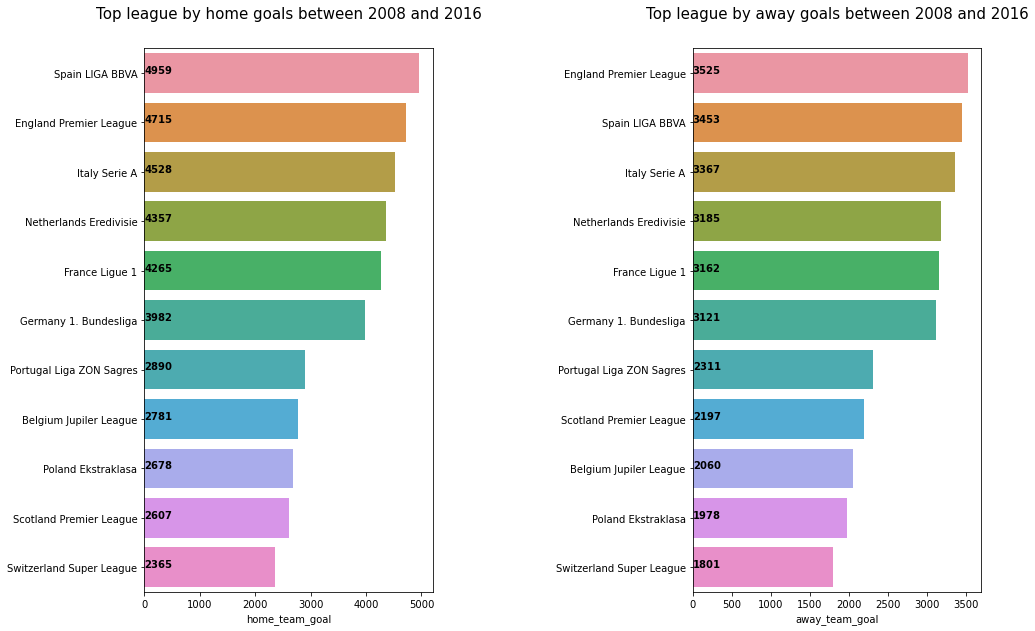

In [767]:
# merge the dataframe

home_leage = df_comb_goals.groupby("name")["home_team_goal"].sum().reset_index()
away_leage = df_comb_goals.groupby("name")["away_team_goal"].sum().reset_index()
home_leage = home_leage.sort_values(by="home_team_goal",ascending= False)
away_leage = away_leage.sort_values(by="away_team_goal",ascending= False)

plt.figure(figsize=(15,10))
plt.subplot(121)

# Top Leage by Home Goals

ax = sns.barplot(y="name",
                 x="home_team_goal",
                 data=home_leage)

plt.ylabel('')
plt.title("Top league by home goals between 2008 and 2016", 
          size="15", 
          pad=30)

for i,j in enumerate(home_leage["home_team_goal"]):
    ax.text(.7,
            i,
            j,
            weight = "bold")
    
# Top Leage by Away Goals
    
plt.subplot(122)
ax = sns.barplot(y="name",
                 x="away_team_goal",
                 data=away_leage)

plt.ylabel("")
plt.subplots_adjust(wspace = .9)
plt.title("Top league by away goals between 2008 and 2016", 
          size="15", 
          pad=30)


for i,j in enumerate(away_leage["away_team_goal"]):
    ax.text(.7,
            i,
            j,
            weight = "bold")

The above charts illustrate there is a competition between Spain and England since they are ranked as the first or second in both occasions. In addition, Italy is saved its place as third heighest scoring in both occasions. Also, Switzerland is ranked as the last league with difference more than 2500 goals comparing to LIGA. This means it might never reach the first place.

In [705]:
df_total = df_match.merge(df_team, left_on="id", right_on="id", how="outer")
df_comb_home_total = df_total.groupby('team_long_name')['home_team_goal'].sum().reset_index().sort_values(by = "home_team_goal", 
                                                                                                     ascending = False)
df_comb_home_total[:5]

,team_long_name,home_team_goal
189,Pescara,6.0
294,Évian Thonon Gaillard FC,5.0
248,Sporting Lokeren,5.0
274,Valenciennes FC,4.0
235,SV Werder Bremen,4.0


In [706]:
df_comb_away_total = df_total.groupby('team_long_name')['away_team_goal'].sum().reset_index().sort_values(by = "away_team_goal", 
                                                                                                     ascending = False)
df_comb_away_total[:5]

,team_long_name,away_team_goal
120,Hamburger SV,6.0
63,ES Troyes AC,4.0
244,SpVgg Greuther Fürth,4.0
174,Newcastle United,4.0
148,Le Havre AC,3.0


### Research Question 3
#### How many matches has been played in each league?

In [708]:
df_country_league = df_country.merge(df_league, left_on="id",right_on="id",how="outer")
df_country_league = df_country_league.drop("id",axis = 1)
df_country_league = df_country_league.rename(columns={'name_x':"country", 'name_y':"league"})

df_country_league.head(11)

,country,country_id,league
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League
2,France,4769,France Ligue 1
3,Germany,7809,Germany 1. Bundesliga
4,Italy,10257,Italy Serie A
5,Netherlands,13274,Netherlands Eredivisie
6,Poland,15722,Poland Ekstraklasa
7,Portugal,17642,Portugal Liga ZON Sagres
8,Scotland,19694,Scotland Premier League
9,Spain,21518,Spain LIGA BBVA


In [709]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [710]:
# subsetting data with necessary columns
df_matche_league = df_match[['country_id',
                    'home_team_goal', 'away_team_goal']]

In [711]:
# merge leauge dataframe whitin match dataframe
df = df_matche_league.merge(df_league,left_on="country_id",right_on="country_id")

# chech null values
df.shape

(25979, 5)

In [712]:
# Unique values in data
df.nunique()

country_id        11
home_team_goal    11
away_team_goal    10
id                11
name              11
dtype: int64

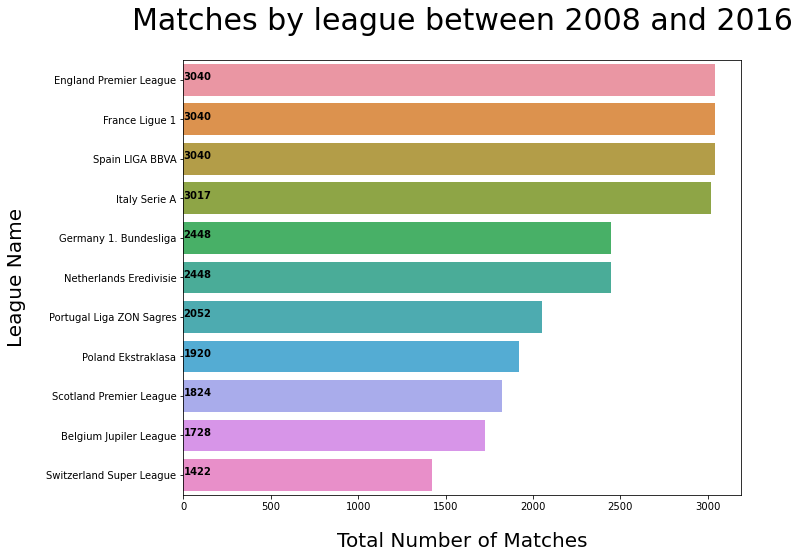

In [713]:
plt.figure(figsize=(10,8))
ax = sns.countplot(y = df["name"],
                   order=df["name"].value_counts().index,
                   linewidth = 1)

for i,j in enumerate(df["name"].value_counts().values):
    ax.text(.7,
            i,
            j,
            weight="bold")
    
plt.title("Matches by league between 2008 and 2016", size="30", pad=30)
plt.xlabel("Total Number of Matches", size="20", labelpad=20)
plt.ylabel("League Name", size="20", labelpad=20)
plt.show()

The data shows the matches have been done in Europe are not equal because the number of clubs are not equal as well. Also, we might guess that the total number of clubs in England, France and Spain are equal.

However, Switzerland Super League is also ranked as the last league and this chart helps us to justify why the big difference in goals between Switzerland and Spain.

### Research Question 4
#### Compare between two players?

In [773]:
# merge df_player dataframe with df_player_attributes dataframe
player_info = df_player_attributes.merge(df_player,left_on="player_api_id",right_on="player_api_id",how="left")

index  = "player_api_id"

cols = ['overall_rating','potential', 'crossing', 'finishing', 'short_passing', 'free_kick_accuracy',
        'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'reactions', 'balance', 
        'shot_power', 'jumping', 'strength', 'long_shots', 'interceptions', 'positioning','penalties', 
        'marking', 'standing_tackle', 'sliding_tackle']

# function will be used to compare between any two players by their names. This function should help us to understand
# the characteristics of each player.
def compare_between(player1, player2):
    
    p1 = player_info[player_info["player_name"] == player1]
    p1 = p1.groupby(["player_name"])[cols].mean()
    
    p2 = player_info[player_info["player_name"] == player2]
    p2 = p2.groupby(["player_name"])[cols].mean()
    
    z  = pd.concat([p1, p2]).transpose().reset_index()
    z  = z.rename(columns={"index":"attributes",
                           player1:player1,
                           player2:player2}
                 )
    
    z.index = z.attributes
    z[[player1,
       player2]].plot(kind = "barh",
                      figsize = (10,10),
                      linewidth = 0.2,
                      width = .5,
                            )
    plt.xlabel("Mean value")
    plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
    plt.grid(True,alpha = .3)
    plt.title(player1 + " VS " + player2, size="30", pad=30)

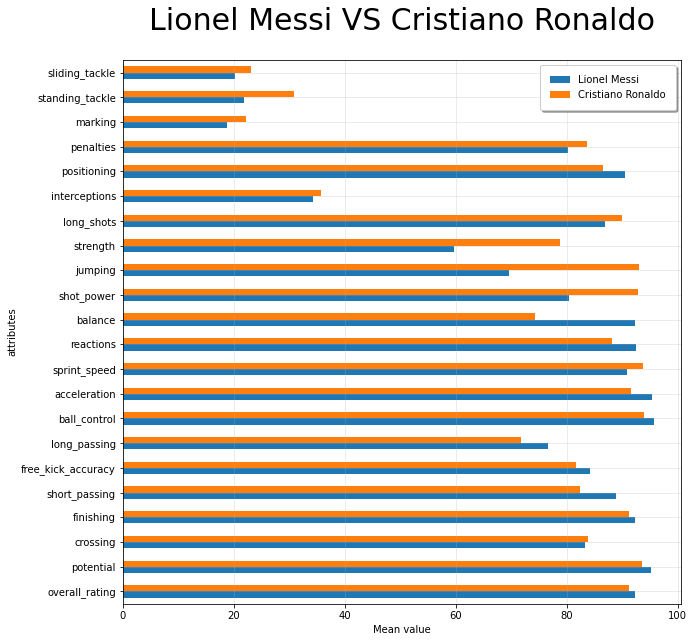

In [774]:
compare_between('Lionel Messi','Cristiano Ronaldo')

The above chart compares between Cristiano Ronaldo and Lionel Messi. The comparision shows Ronalso is better than Messi in physical interactions. On the other hand Messi is a team player more than Ronaldo.

There is a significant difference between Messi and Ronaldo in Strenght, Jumping, Shot power and Balance.

The overall rating shows Messi is much better than Ronaldo with little difference.

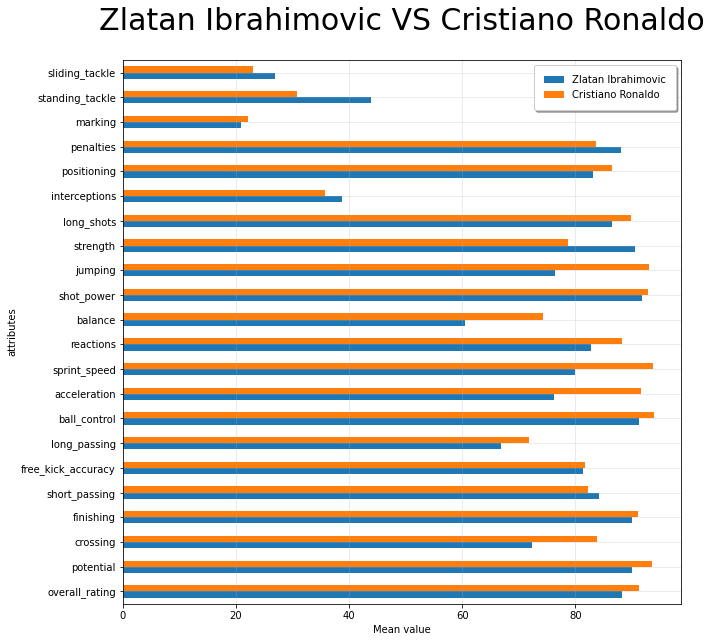

In [775]:
compare_between('Zlatan Ibrahimovic','Cristiano Ronaldo')

Ronaldo's body is very strong comparing to other players, but the above chart shows that Ibrahimovic is more stronger than Ronaldo for anything related to pysical interacgtions.

The overall rating shows Ronaldo is much better than Ibrahimovic.

<a id='conclusions'></a>
## Conclusions

In conclusion, after investigation and understanding the data I was able to know and make sure about several details which I was know nothing about them such as I always think Rolnaldo is better than Messi. 

Moreover, based on the analysis there is an advantage for the club who is playing in his home better the guest since the home goals is always higher than away goals.

In addition, there is a competition between Spain LIGA and England Premier League.

Also, the data shows that the total numbers of clubs are not equal since the total matches had been played is different.

Finally, the data shows that the European defence is tough since there are a lot number of penalties.